Projects to Understand Model Evaluation

In [1]:
# Run this cell in Colab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

sns.set(style="whitegrid")


Project 1: Baseline Evaluation


--- Logistic Regression ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



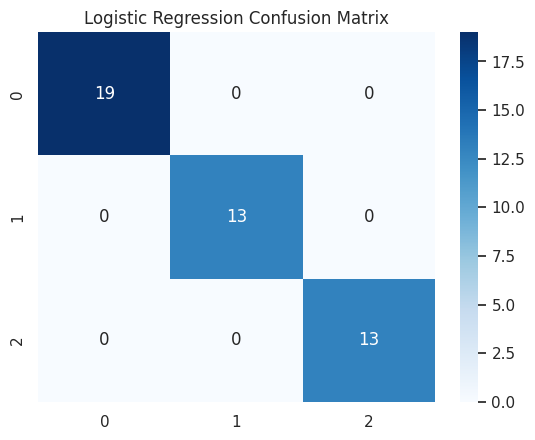


--- KNN ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



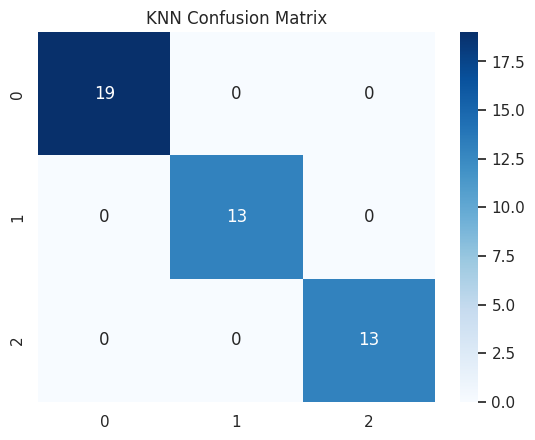


--- SVM ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



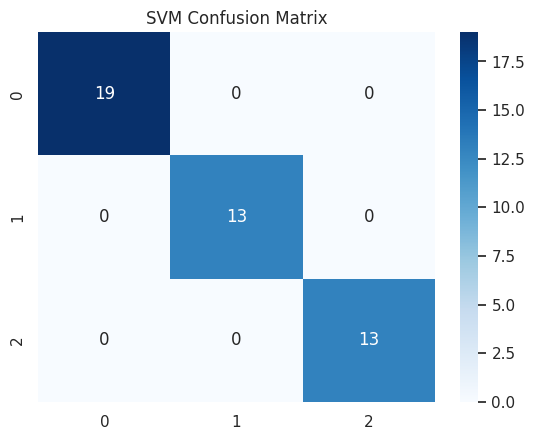

In [2]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()


Project 2: Binary Classification (Setosa vs Not)

Binary Classification - Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


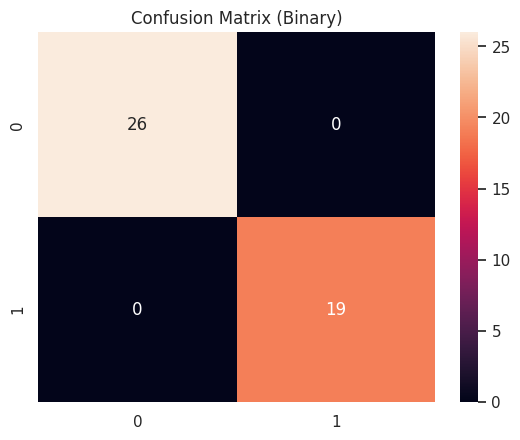

In [3]:
# Map labels to binary
y_binary = (y == 0).astype(int)  # 1 if Setosa, 0 otherwise
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Train & evaluate
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Binary Classification - Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix (Binary)")
plt.show()


Project 4: Threshold Tuning with ROC & Precision-Recall Curves


Threshold: 0.1
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Threshold: 0.2
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Threshold: 0.30000000000000004
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Threshold: 0.4
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Threshold: 0.5
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Threshold: 0.6
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Threshold: 0.7000000000000001
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Threshold: 0.8
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


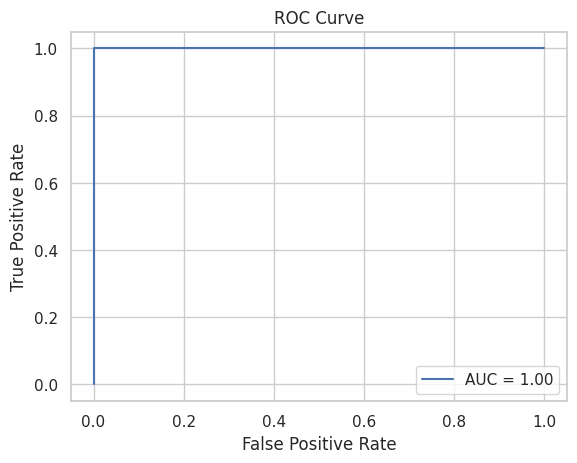

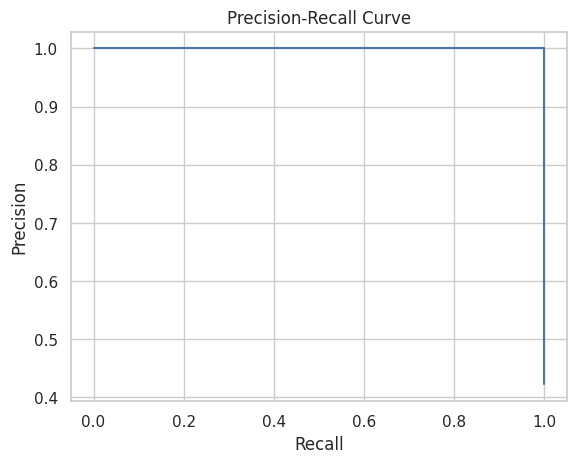

In [4]:
# Use binary classification setup from Project 2
model = LogisticRegression()
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)[:, 1]

# Threshold tuning
thresholds = np.arange(0.1, 0.9, 0.1)
for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    print(f"\nThreshold: {thresh}")
    print("Precision:", precision_score(y_test, y_pred_thresh))
    print("Recall:", recall_score(y_test, y_pred_thresh))
    print("F1-Score:", f1_score(y_test, y_pred_thresh))

# Plot ROC & Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_probs)
prec, rec, _ = precision_recall_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve"); plt.legend(); plt.show()

plt.plot(rec, prec)
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


Project 5: Cross-Validation with Metric Averaging

In [5]:
# Use original multiclass dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\n--- {name} ---")
    acc = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
    f1 = cross_val_score(model, X_scaled, y, cv=kfold, scoring='f1_macro')
    print(f"Accuracy: {acc.mean():.3f} ± {acc.std():.3f}")
    print(f"F1-score: {f1.mean():.3f} ± {f1.std():.3f}")



--- Logistic Regression ---
Accuracy: 0.953 ± 0.045
F1-score: 0.953 ± 0.045

--- KNN ---
Accuracy: 0.967 ± 0.037
F1-score: 0.967 ± 0.037

--- SVM ---
Accuracy: 0.953 ± 0.045
F1-score: 0.953 ± 0.045
